# Основные концепции Machine Learning. Домашняя работа

# В рамках задачи регрессии нужно предсказать цену телефона

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

matplotlib.rc("font", size=18)

In [4]:
phones = pd.read_csv("1.8_phones.csv")

In [58]:
phones

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
...,...,...,...,...
95,512,iOS,8398,2011
96,64,Android,7197,2016
97,32,Android,5694,2014
98,32,Android,7589,2016


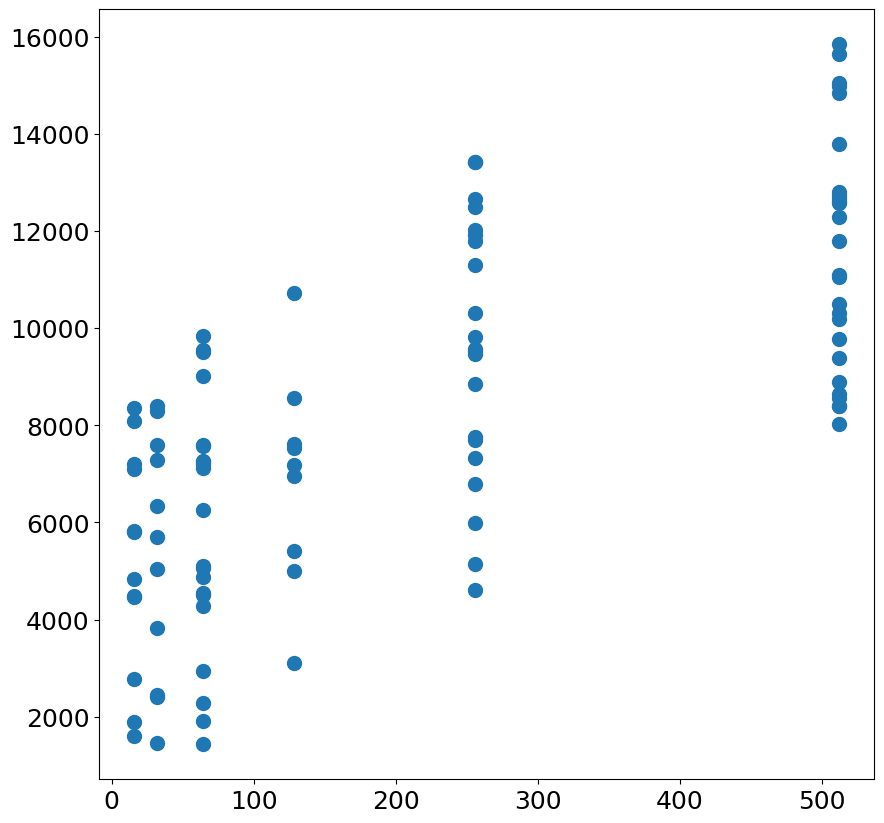

In [5]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=100)

# отображаем картинку
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression

Задание 1: обучить модель регрессии

In [7]:
X = phones[["disk"]]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [8]:
# вытаскиваем нужные коэффициенты
[b] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(disk):
    return a + b * disk

In [9]:
reg_prediction(X.disk[0])

6120.265447090668

In [10]:
reg.predict(X[0:1])[0]

6120.265447090668

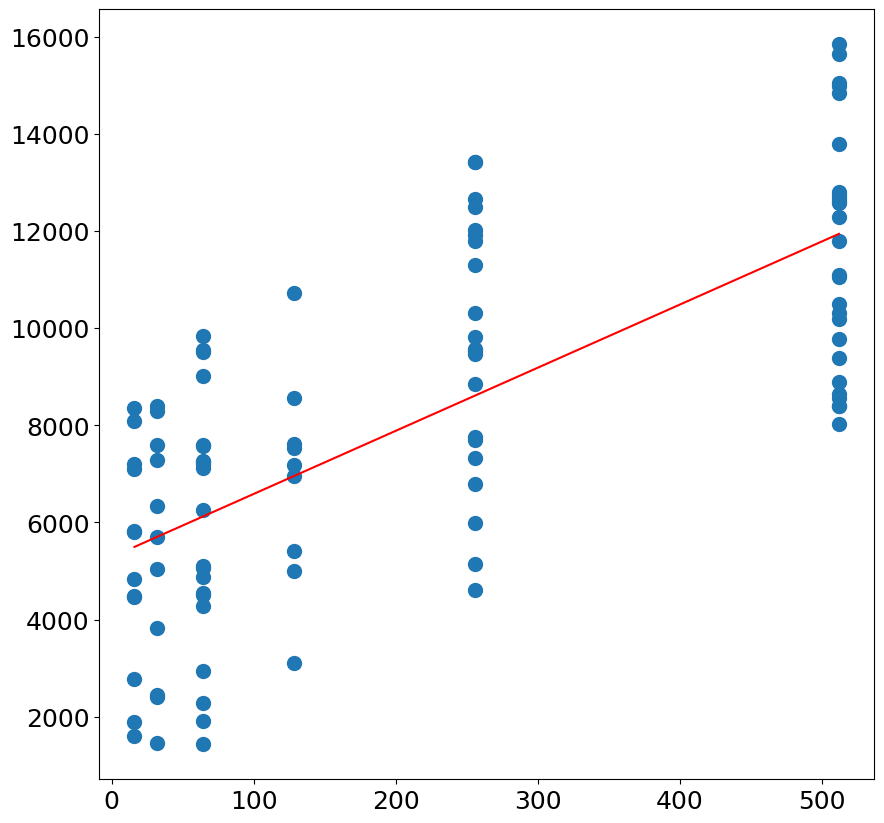

In [ ]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку
ax = plt.axes()

# помещаем точки на график
ax.scatter(phones["disk"], phones["price"], s=100)
# помещаем предсказания
ax.plot([X.disk.min(), X.disk.max()], [reg_prediction(X.disk.min()), reg_prediction(X.disk.max())], c="red")

# отображаем картинку
plt.show()

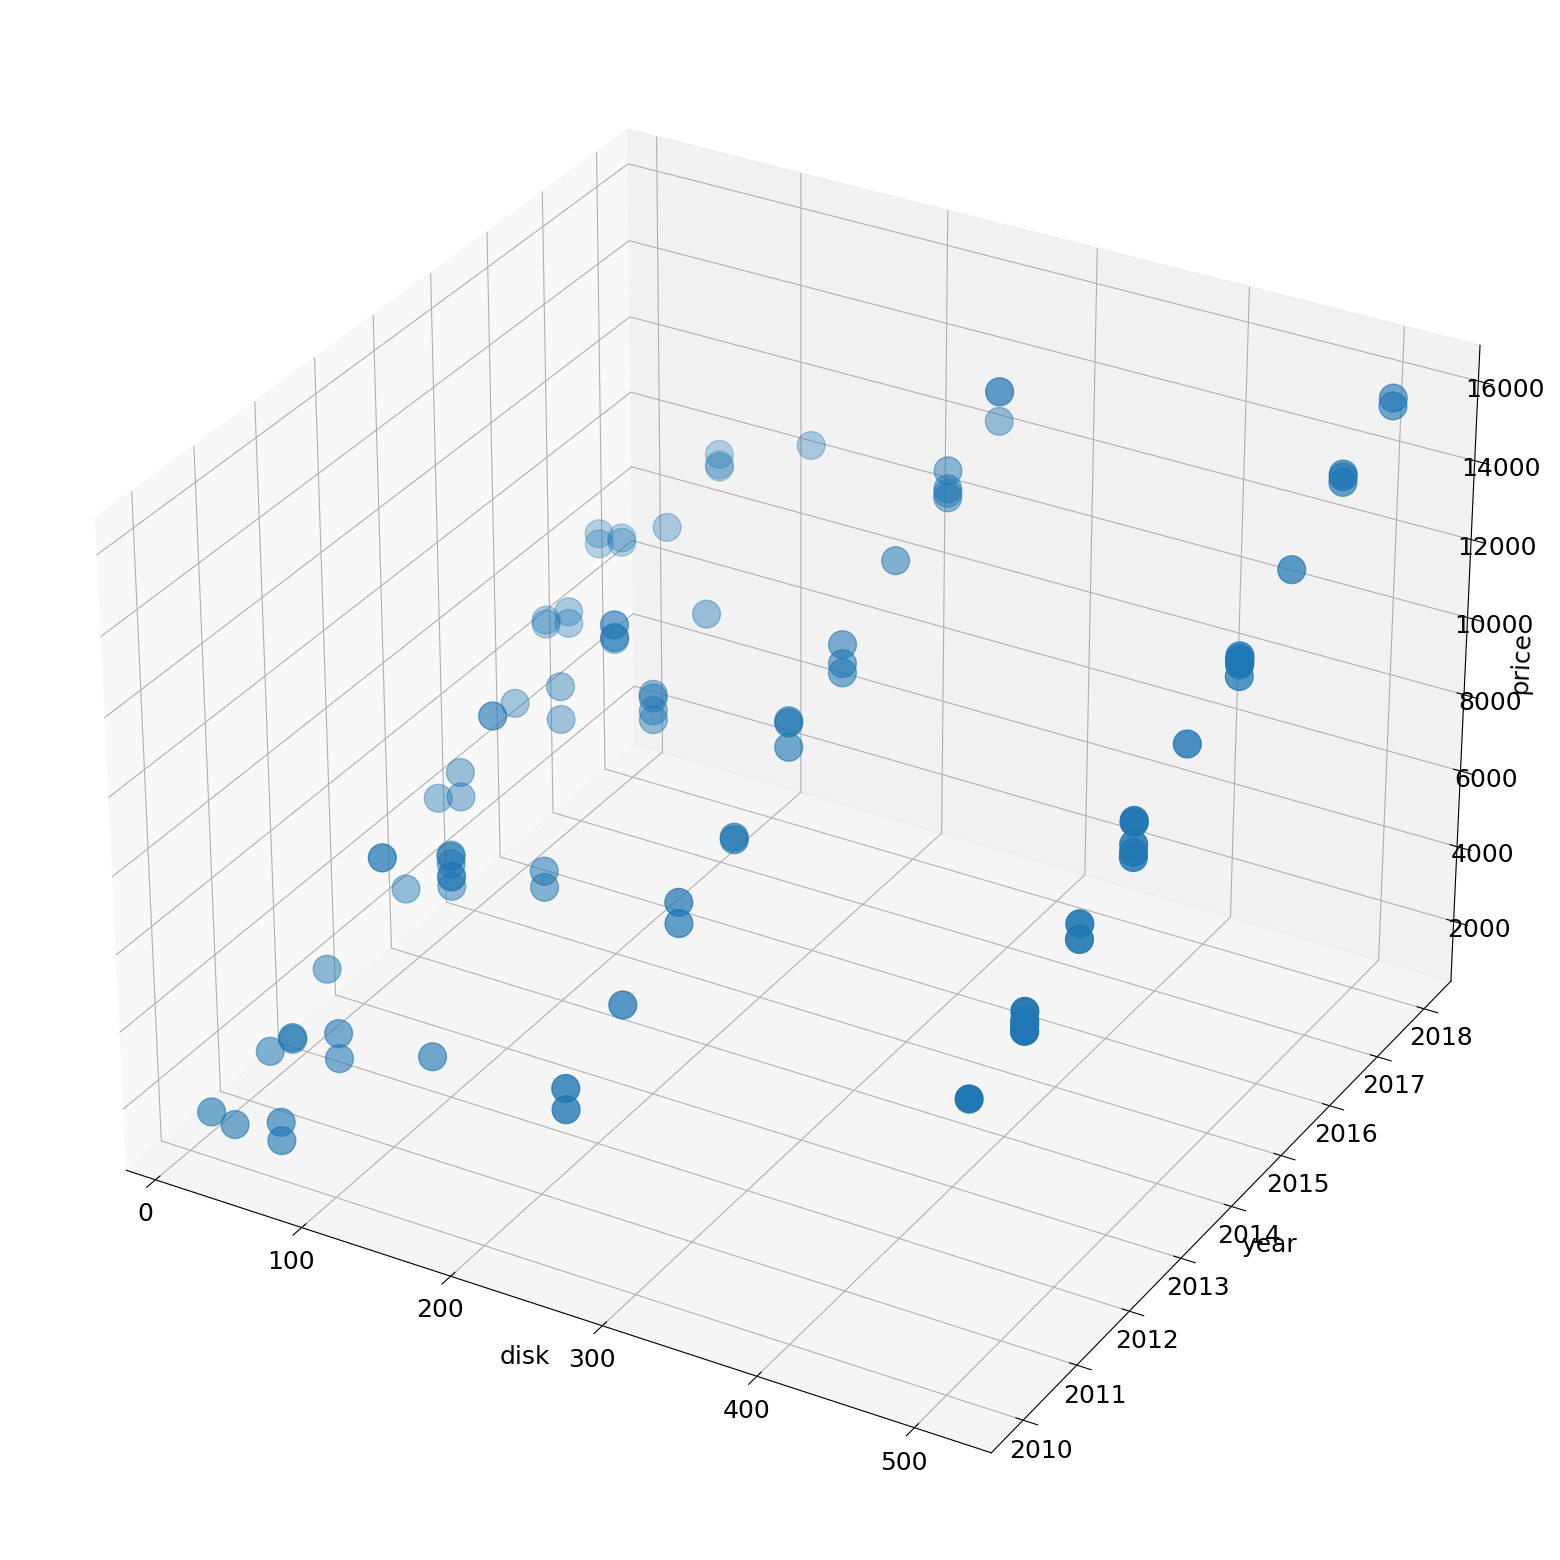

In [23]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=400)

# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")

# отображаем картинку
plt.show()

In [24]:
# импортируем модуль, отвечающий за линейную регрессию
from sklearn.linear_model import LinearRegression

In [25]:
X = phones[["disk", "year"]]
y = phones["price"]

# создаем регрессор
reg = LinearRegression().fit(X, y)

In [34]:
# вытаскиваем нужные коэффициенты
[b1, b2] = reg.coef_
a = reg.intercept_

# создаем функцию для предсказания цены дома
def reg_prediction(disk, year):
    return a + b1 * disk + b2 * year

In [35]:
reg_prediction(X.disk[0], X.year[0])

7848.046694419114

In [36]:
reg.predict(X[0:1])[0]

7848.046694419114

In [38]:
d1, d2 = list(), list()
for x in np.linspace(min(phones["disk"]), max(phones["disk"]), 100):
    for y in np.linspace(min(phones["year"]), max(phones["year"]), 100):
        d1.append(x)
        d2.append(y)
d1 = np.array(d1).reshape(-1, 1)
d2 = np.array(d2).reshape(-1, 1)
p = reg.predict(np.concatenate([d1, d2], axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


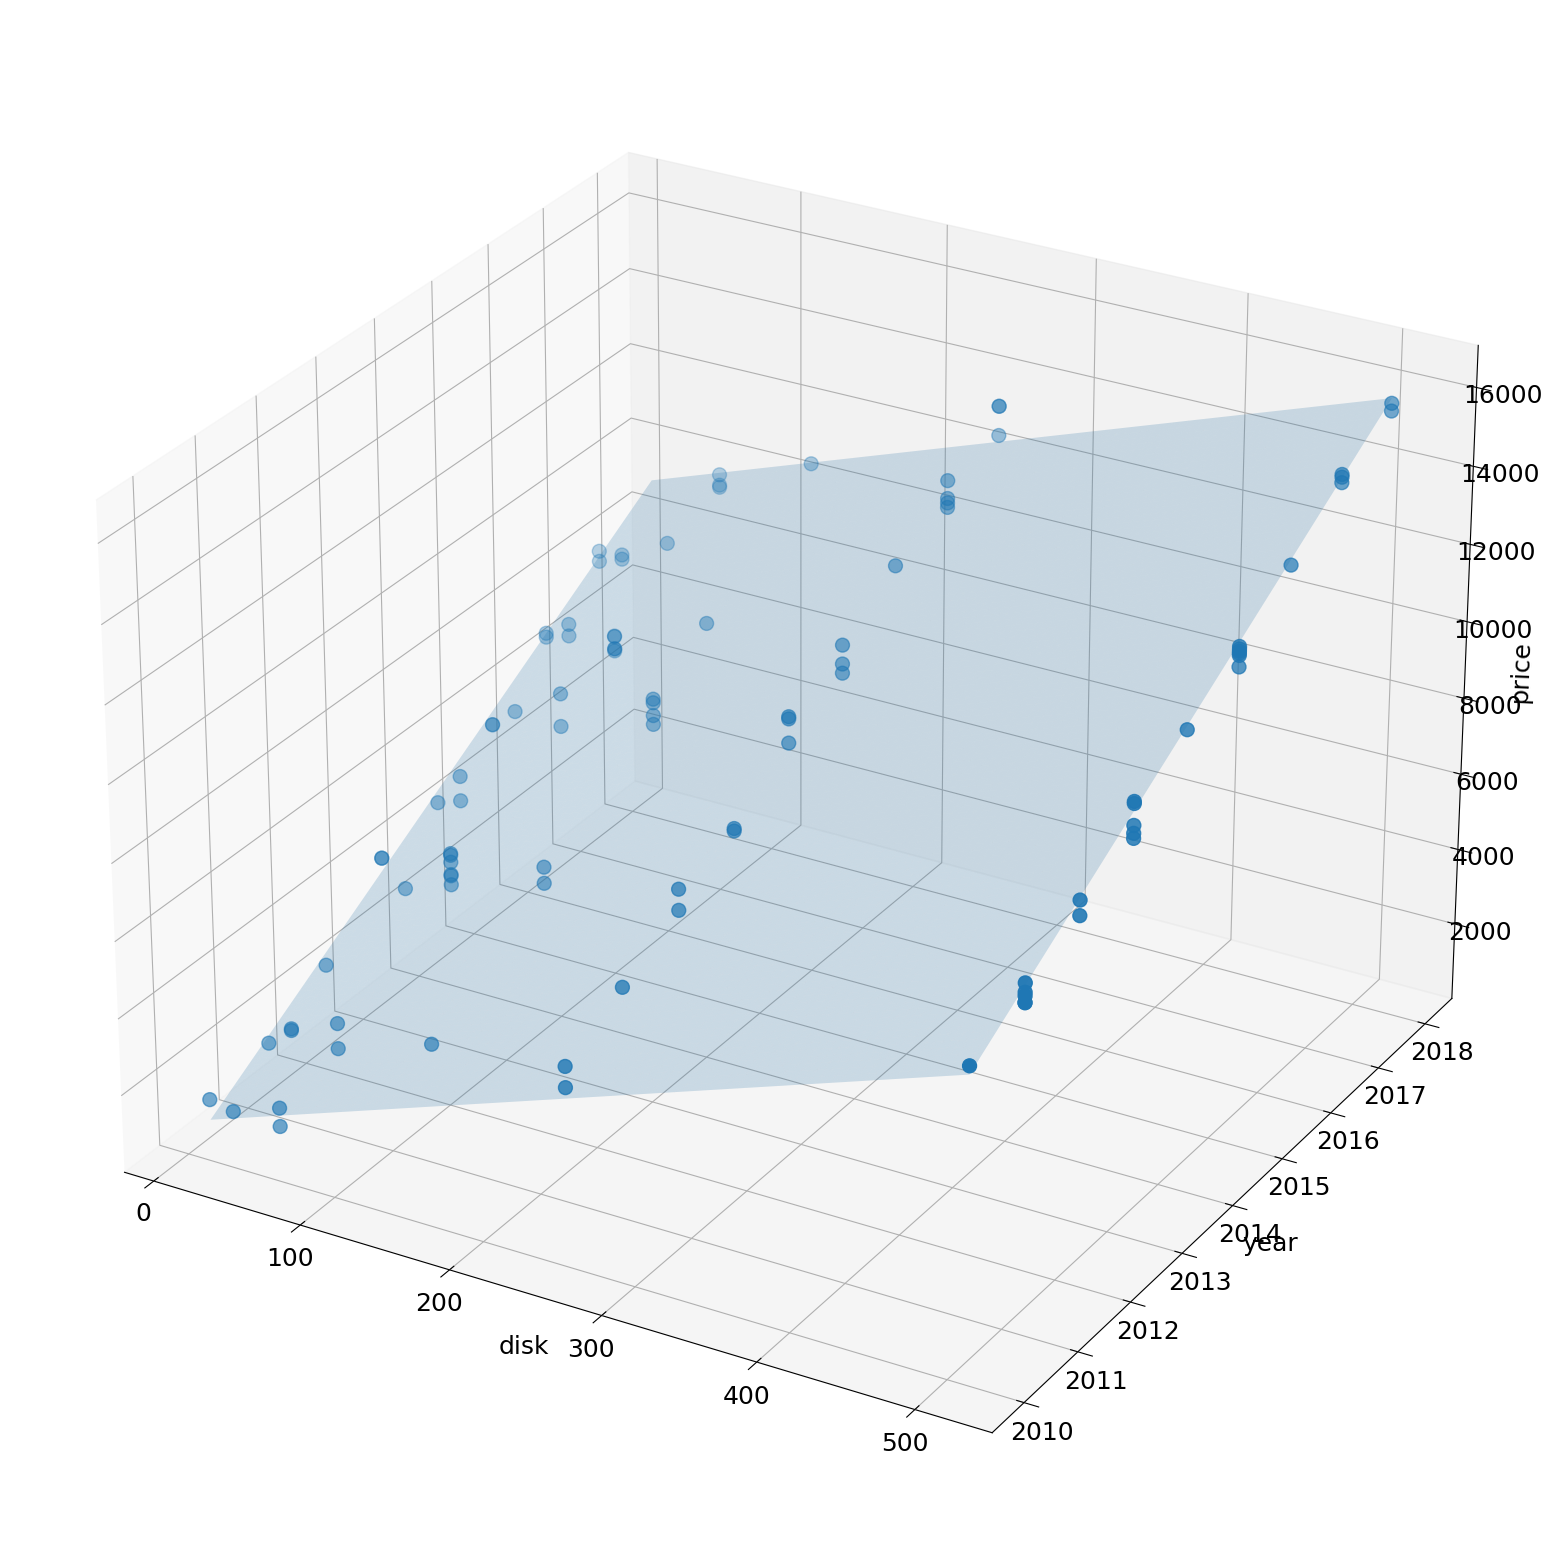

In [40]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку
ax = plt.axes(projection="3d") # устанавливаем проекцию

# помещаем точки на график
ax.scatter(phones["disk"], phones["year"], phones["price"], s=100)

# помещаем предсказанные значения на график
ax.plot_trisurf(d1.ravel(), d2.ravel(), p.ravel(), alpha=0.2)


# называем оси
ax.set_xlabel("disk")
ax.set_ylabel("year")
ax.set_zlabel("price")


# изменяем позицию камеры и отрисовываем картинку
ax.elev = 27
plt.show()

Задание 2: обучить модель классификации

Предсказать операционную систему или год выпуска устройства

In [41]:
import numpy as np
import pandas as pd

In [42]:
# импортируем модуль, отвечающий за деревья решений
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text

In [45]:
# выгружаем признаки и целевые значения в отдельные переменные
X = phones[["disk", "year"]]
y = phones["os"]

# создаем классификатор
cl = DecisionTreeClassifier().fit(X, y)

In [46]:
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [47]:
cl.predict(X[7:8])[0], y[7]

('Android', 'Android')

Задание 3: обучить модель кластеризации

Для задачи кластеризации необходимо запустить алгоритм кластеризации, в котором количество кластеров и признаки можете выбрать на свое усмотрение

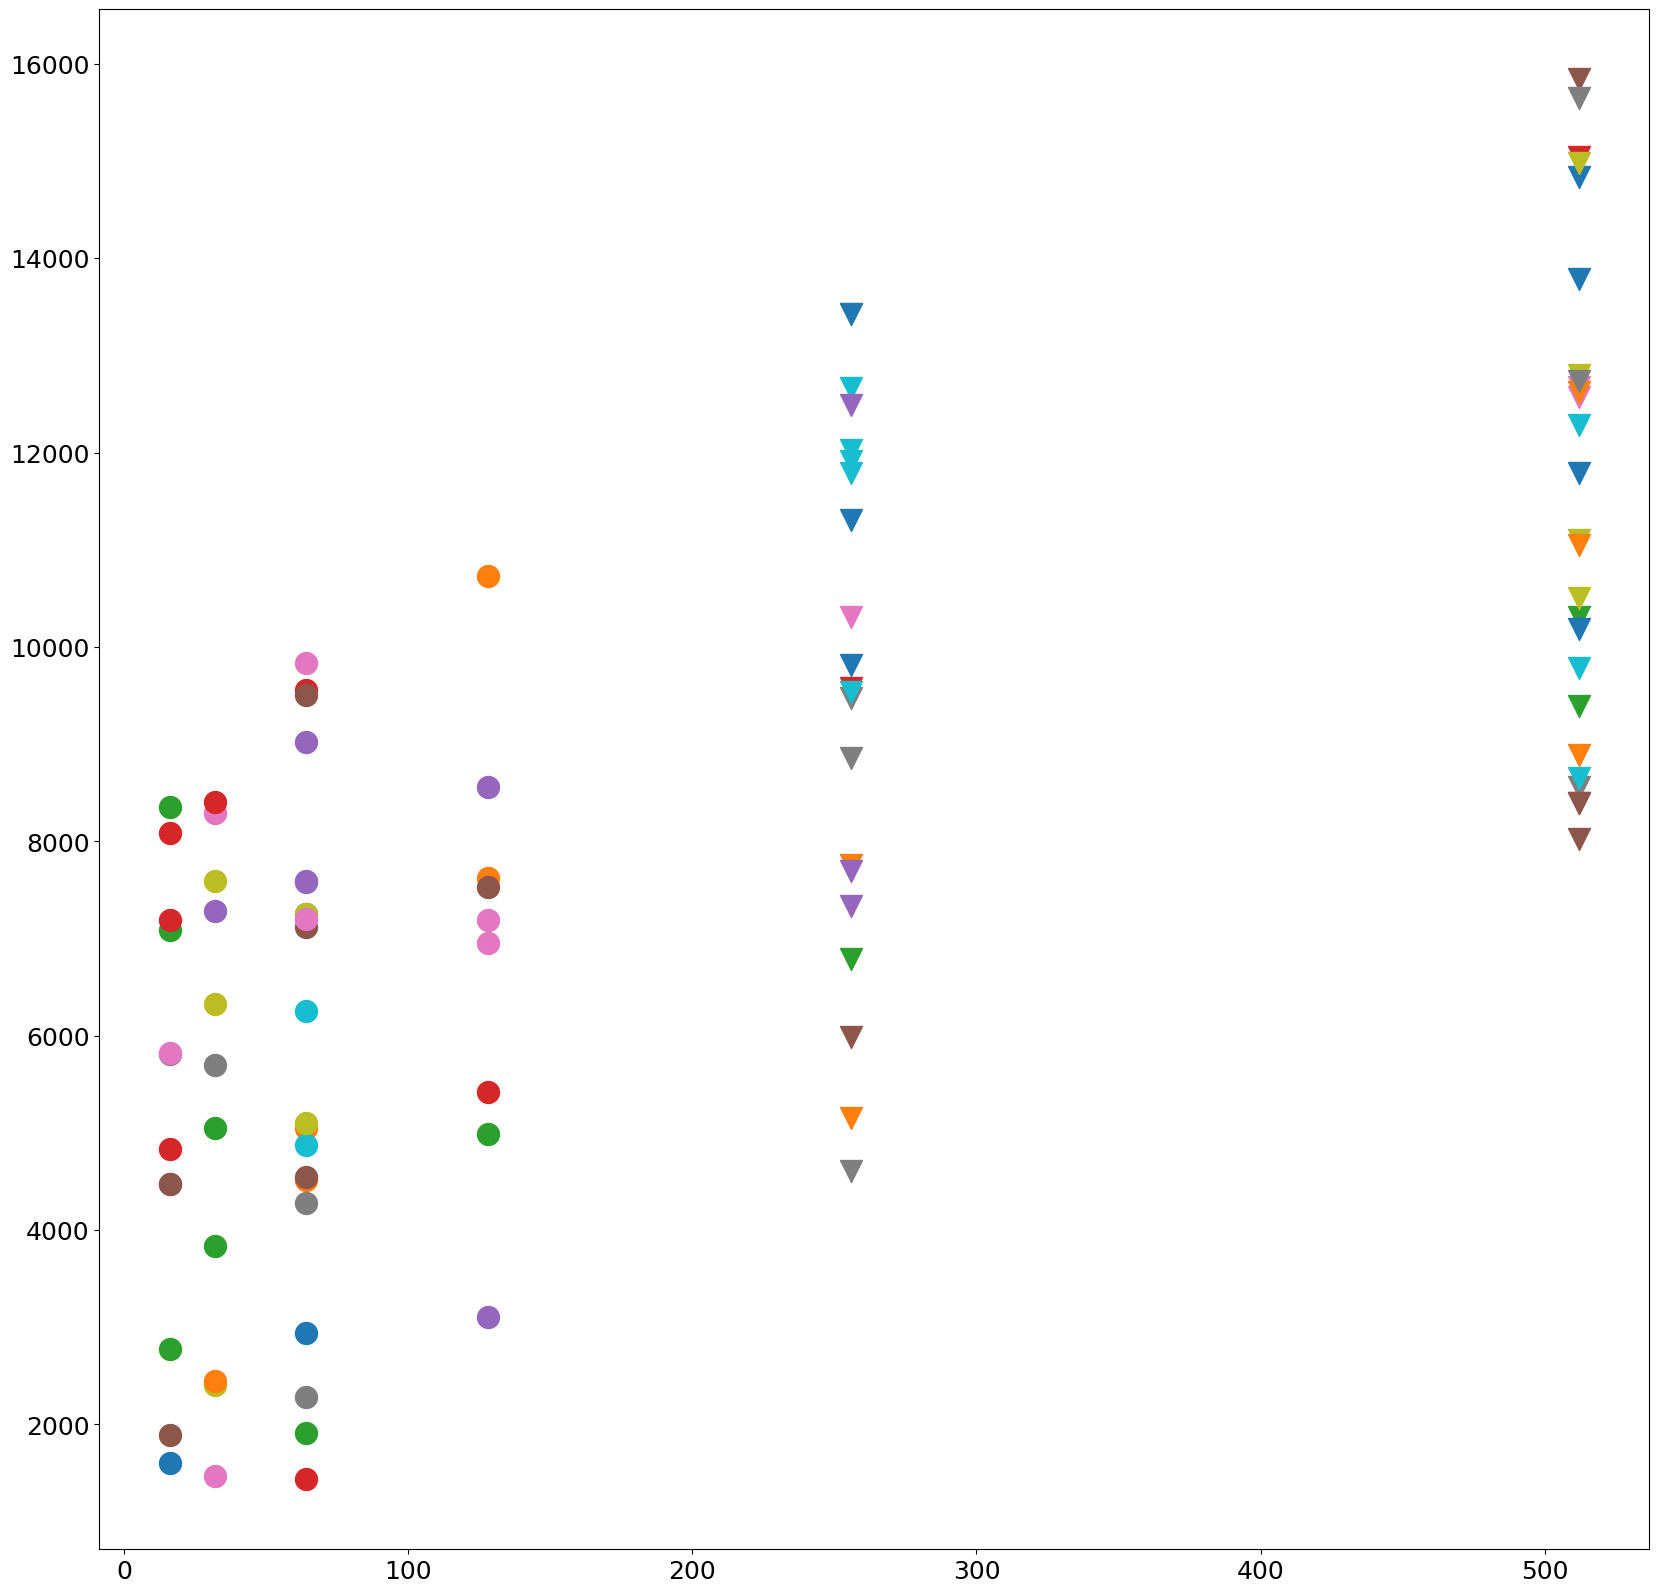

In [127]:
fig = plt.figure(figsize=(20, 20)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# отображаем картинку
plt.show()

In [116]:
# импортируем модуль, отвечающий за кластеризацию
from sklearn.cluster import KMeans

In [128]:
# выгружаем признаки в отдельную переменную
X = phones[["disk", "price"]]

# создаем модель для кластеризации
clust = KMeans(n_clusters=3).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [129]:
# смотрим центры кластеров
[c1, c2, c3] = clust.cluster_centers_

In [130]:
clust.cluster_centers_

array([[   70.4       ,  3958.53333333],
       [  212.17391304,  8323.32608696],
       [  410.66666667, 12896.83333333]])

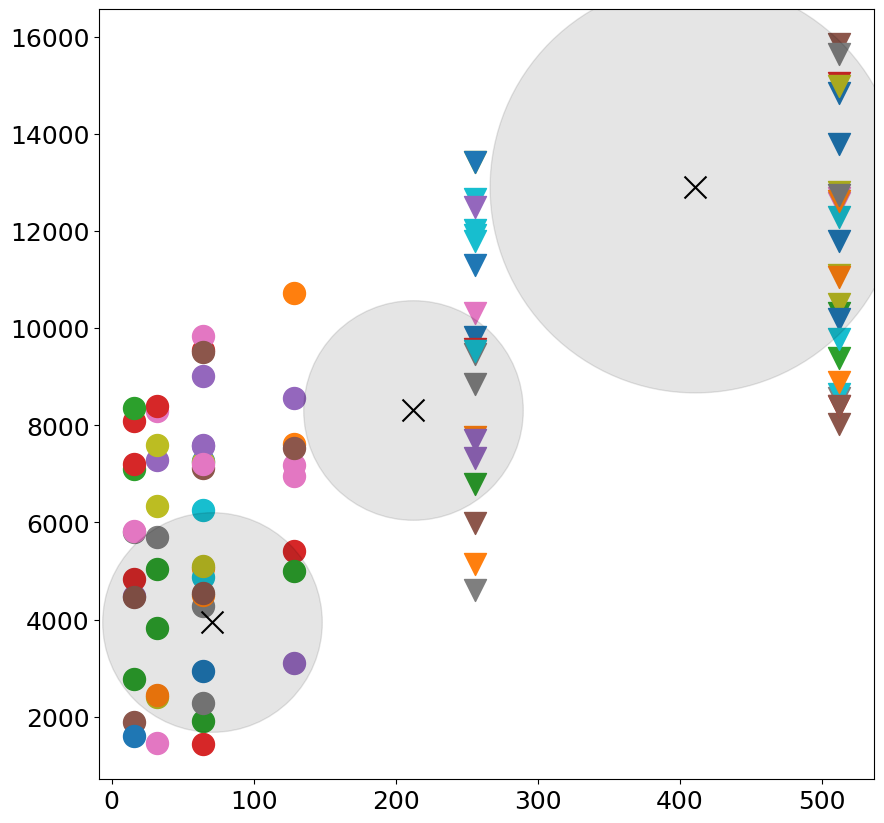

In [132]:
fig = plt.figure(figsize=(10, 10)) # создаем картинку

markers = {"Android": "o", "iOS": "v"}
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l])

# добавляем информацию о центрах кластеров
plt.scatter(c1[0], c1[1], s=250, marker="x", c="black")
plt.scatter(c1[0], c1[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="black")
plt.scatter(c2[0], c2[1], s=250 * 1e2, c="black", alpha=0.1)

plt.scatter(c3[0], c3[1], s=250, marker="x", c="black")
plt.scatter(c3[0], c3[1], s=250 * 3.5e2, c="black", alpha=0.1)


# отображаем картинку
plt.show()